In [1]:
import hylite
from hylite import io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [3]:
from sklearn.cross_decomposition import PLSRegression

In [4]:
from sklearn.metrics import r2_score, mean_squared_error 

In [123]:
Hymap_am = io.load( '/Users/rachdi18/Documents/Namibia_Epembe/Results/AM/hymap_AM.hdr' )
Hymap_br = io.load( '/Users/rachdi18/Documents/Namibia_Epembe/Results/BR/hymap_BR.hdr' )

Enmap_br=io.load('/Users/rachdi18/Documents/Namibia_Epembe/Results/BR/enmap_BR.hdr')
Enmap_am=io.load('/Users/rachdi18/Documents/Namibia_Epembe/Results/AM/enmap_AM.hdr')

Emit_am=io.load('/Users/rachdi18/Documents/Namibia_Epembe/Results/AM/emit_AM.hdr')
Emit_br=io.load('/Users/rachdi18/Documents/Namibia_Epembe/Results/BR/emit_BR.hdr')

Prisma_br=io.load('/Users/rachdi18/Documents/Namibia_Epembe/Results/BR/prisma_BR.hdr')
Prisma_am=io.load('/Users/rachdi18/Documents/Namibia_Epembe/Results/AM/Prisma_AM.hdr')

In [124]:
Enmap_br.data[:,:,0]

array([[0.3001    , 0.2576558 , 0.28577465, ..., 0.05256074, 0.04152431,
        0.11024646],
       [0.43292597, 0.44029015, 0.42306057, ..., 0.07165037, 0.07390464,
        0.10127024],
       [0.45076677, 0.444594  , 0.4510909 , ..., 0.10995967, 0.09141225,
        0.12053949],
       ...,
       [0.47235358, 0.16945149,        nan, ..., 0.28493103, 0.31214526,
        0.29594973],
       [0.4256755 , 0.1844346 , 0.070553  , ..., 0.25097126, 0.28338492,
        0.30746084],
       [0.31399286, 0.23081696, 0.15269098, ..., 0.29763377, 0.33072284,
        0.36156532]], dtype=float32)

In [125]:
Enmap_am.data[:,:,0]

array([[0.27029598, 0.20880264, 0.1936001 , ...,        nan,        nan,
        0.07647712],
       [0.3832143 , 0.40222445, 0.3943219 , ...,        nan,        nan,
               nan],
       [0.45624438, 0.42384663, 0.45241445, ..., 0.02560003,        nan,
        0.03929973],
       ...,
       [       nan,        nan,        nan, ..., 0.42063138, 0.5075285 ,
        0.3627209 ],
       [       nan,        nan,        nan, ..., 0.32179493, 0.38830164,
        0.40499416],
       [       nan,        nan, 0.00681831, ..., 0.39088988, 0.4361146 ,
        0.44735995]], dtype=float32)

In [126]:
Enmap_br.data.shape

(552, 206, 3)

In [127]:
Enmap_am.data.shape

(552, 206, 3)

In [128]:
Hymap_am.data[ Hymap_am.data <= 0. ] = np.nan
Hymap_am.delete_nan_bands
Hymap_am.data = Hymap_am.data.astype(np.float32)
Hymap_am.fill_holes()

Enmap_br.data[ Enmap_br.data <= 0. ] = np.nan
Enmap_br.delete_nan_bands
Enmap_br.data = Enmap_br.data.astype(np.float32)
Enmap_br.fill_holes()

Enmap_am.data[ Enmap_am.data <= 0. ] = np.nan
Enmap_am.delete_nan_bands
Enmap_am.data = Enmap_am.data.astype(np.float32)
Enmap_am.fill_holes()

Prisma_am.data[ Prisma_am.data <= 0. ] = np.nan
Prisma_am.delete_nan_bands
Prisma_am.data = Prisma_am.data.astype(np.float32)
Prisma_am.fill_holes()

Prisma_br.data[ Prisma_br.data <= 0. ] = np.nan
Prisma_br.delete_nan_bands
Prisma_br.data = Prisma_br.data.astype(np.float32)
Prisma_br.fill_holes()

Emit_am.data[ Emit_am.data <= 0. ] = np.nan
Emit_am.delete_nan_bands
Emit_am.data = Emit_am.data.astype(np.float32)
Emit_am.fill_holes()

Emit_br.data[ Emit_br.data <= 0. ] = np.nan
Emit_br.delete_nan_bands
Emit_br.data = Emit_br.data.astype(np.float32)
Emit_br.fill_holes()

Hymap_br.data[ Hymap_br.data <= 0. ] = np.nan
Hymap_br.delete_nan_bands
Hymap_br.data = Hymap_br.data.astype(np.float32)
Hymap_br.fill_holes()

In [195]:
x=Enmap_am.data[:,:,0].flatten()[:,None]
y=Emit_am.data[:,:,0].flatten()[:,None]
#print(x)
#print(y)

In [196]:
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

In [197]:
a = model.coef_
b = model.intercept_

In [198]:
# Predict y values using the fitted linear equation
predicted_y_values = model.predict(x)

# Calculate the coefficient of determination (R^2 score)
r2 = r2_score(y, predicted_y_values)
#std
mse=mean_squared_error(y,predicted_y_values)
rmse = np.sqrt(mean_squared_error(y, predicted_y_values))
#std_err = stats.linregress(x,y)
# Print the results
print("Fitted Equation: y =", a, "x +", b)
print("R^2 Score:", r2)
print('MSE:',mse)
print('Root mean squared error: ', rmse)

Fitted Equation: y = [[0.83990014]] x + [0.05865836]
R^2 Score: 0.6184197926066599
MSE: 0.015530956
Root mean squared error:  0.124623254


Text(0, 0.5, 'EMIT_AM')

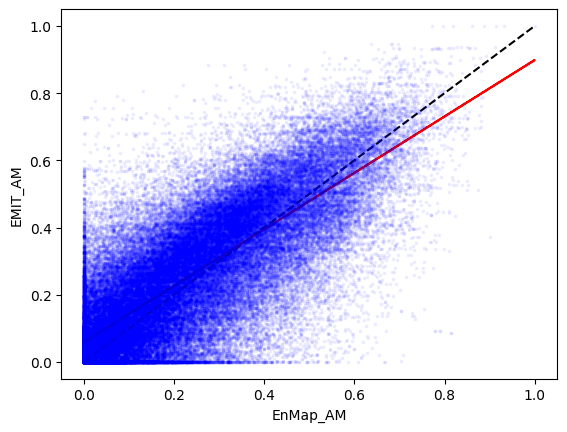

In [199]:
plt.scatter(x,y, s=1, c='blue',marker=',', alpha=0.05)
plt.plot([0,1.],[0,1.],color='k', ls='--', zorder=0 ) 
plt.plot(x, a*x+b, color='r', zorder=0)
plt.xlabel('EnMap_AM')
plt.ylabel('EMIT_AM') 